<h2>Optimizerlar SGD, Mini BGD, MGD + Bonus Keras kod

ANN (artificial neural networks) - bu miya neyronlariga o'xshash sun'iy neyron tarmoq bo'lib, modellashtirish va muammolarni prognoz qilish uchun ishlatiladi.Unda tugunlar hech qachon tsikl hosil qilmaydi. Ushbu turdagi neyron tarmoqning kirish qatlami, yashirin qatlamlari va chiqish qatlami mavjud. Bu sun'iy neyron tarmog'ining birinchi va eng oddiy turi.ANN algoritmi faqat raqamli va strukturali ma'lumotlarni qabul qiladi.

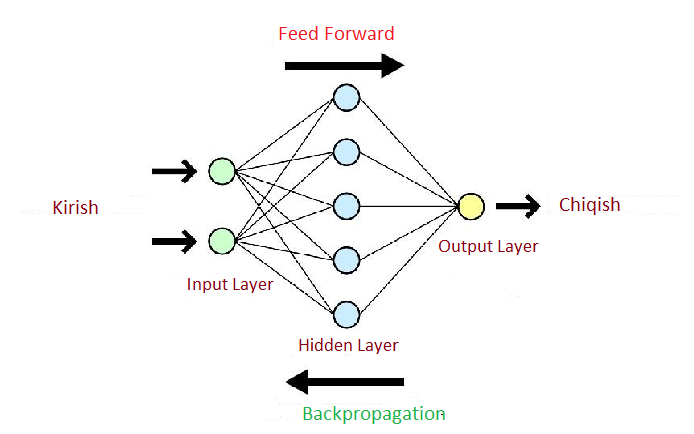

    Backpropagation neyron tarmoqlarni o'qitishning mohiyatidir. Bu oldingi davrda (ya'ni, iteratsiya) olingan xatolikka asoslangan neyron tarmoqning og'irliklarini(weights) nozik sozlash usuli. Og'irliklarni to'g'ri sozlash xatoliklarni kamaytirishga va uning umumlashtirilishini oshirish orqali modelni ishonchli qilishga imkon beradi.Backpropagation "xatolarning orqaga tarqalishi" ning qisqa shaklidir. Bu sun'iy neyron tarmoqlarni o'rgatishning standart usuli. Ushbu usul tarmoqdagi barcha og'irliklarga nisbatan yo'qotish funktsiyasining gradientini hisoblashga yordam beradi.
    Neyron tarmog'idagi backpropagation(orqaga tarqalish) algoritmi zanjir qoidasi bo'yicha bitta vazn uchun yo'qotish funktsiyasining gradientini hisoblaydi. Mahalliy to'g'ridan-to'g'ri hisoblashdan farqli o'laroq, u bir vaqtning o'zida bir qatlamni samarali hisoblaydi.
    Backpropagation hisoblashdan avval birinchi iteratsiyada tasodifiy o'rnatilgan weightlardan va kirish ma'lumotlaridan Forward hisoblab olinadi:
    Forward = x1*w1+x2*w2+...+xn*wn+b
    bu yerda x - kiruvchi ma'lumot
             w - og'irliklar(weights)
             b - bias
    Keyin xatolik topiladi(xatoliklar bir necha usuldatopilishi mumkin):
    loss = (y_bash - y) ** 2
    Har bir weight uchun zanzir qoidasi bo'yicha gradient hisoblanadi:
    

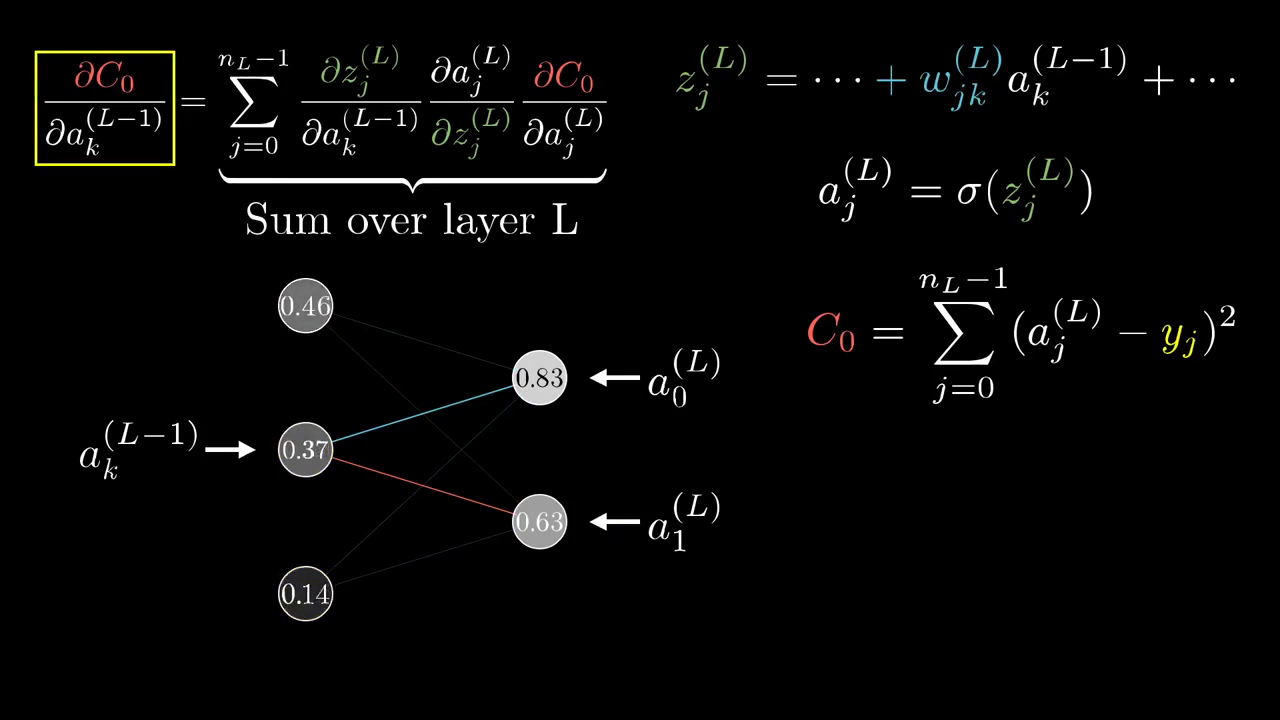

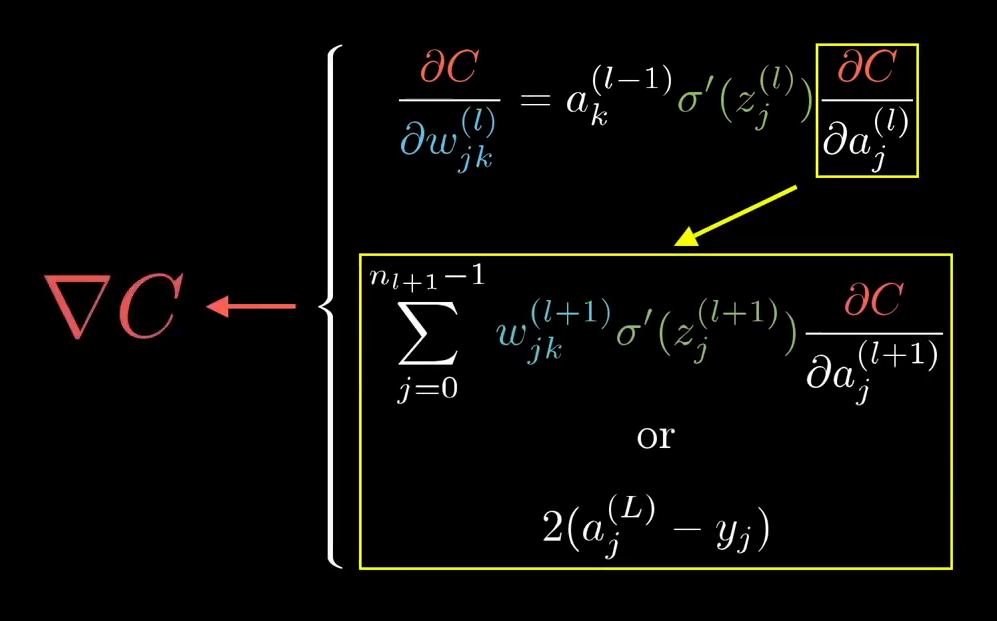

Keyin weightlar va biaslar to'g'rilanadi:
    w1=w1-lr*dw1
    b1=b1-lr*db1
    bu yerda: lr - learning rate
              dw1 - shu weight uchun hisoblangan gradient
              db1 - shu bias uchun hisoblangan gradient
Shu tarzda butun dataset yoki tanlangan namunalar uchun shu jarayon takrorlanadi.
Neyron tarmoqlarda o'qitishni tezlatishga yordam berib eng yaxshi natijalarga erishish uchun 
optimizatorlardan foydalaniladi.Bu model to'g'ri va tez ishlashi uchun weight va learning 
rate(o'qitish tezligi) kabi parametrlarni o'zgartirish uchun foydalaniladigan algoritm.
Ularga quyidagilar kiradi:
    - Batch gradient descent
    - Stochastic gradient descent
    - Mini Batch gradient descent
    - Adam 
    - Adadelta
    - RMSprop
    - va hokazolar.
Gradient Descent bu aniqlanadigan manfiy gradient qiymatini eng tez tushishiga takror xarakatlar bilan
yo'naltirish funksiyasini minimizatsiya qilish uchun foydalaniladiganoptimizatsiya algoritmidir.Biz Deep 
Learningda gradient descentdan modelni parametrlarini yangilashda ishlatamiz.
Yuqoridagilarni eng ko'p ishlatiladiganlariga ta'rif beramiz
  Batch gradient descent - bunda barcha namunalar birdaniga forward hisoblashga berilib,
xatolik(Loss)ni o'rtachasi hisoblanib backward hisoblanadi.
  Stochastic gradient descent - modelni o'qitishda har safar 1 ta namunani(sample) beramiz va 
parametrlarni yangilaymiz.Buni har bir namuna uchun qilamiz.Bu juda ko'p vaqt oladi.Shuning uchun 
mini batch SGD ham ishlatiladi.Bu Deep Learningda qo'llaniladigan GD ning amalda eng keng tarqalgan
turi.
  Mini batch SGD - da modelni o'qitishda biz bir guruh namunalar olamiz.(Masalan:32,64,..).Ushbu yondashuv
yaxshiroq ishlaydi.Chunki u har bir namuna uchun emas, balki mini to'plm uchun bitta siklni talab qiladi.
Mini batchlar xar bir iteratsiya uchun tasodifiy tanlanadi.Mini batch tasodifiy tanlanganda lokal 
minimumga tushib qolganida ba'zi shovqinli qadamlar bu minimumdan chiqarib yuboradi.
  Adam - neyron tarmoqlarni o'qitishda eng samarali optimallashtirish algoritmlaridan biridir. U
RMSPropda bo'lgani kabi birinchi momentning o'rtacha qiymatiga asoslanganparametrlarni o'rganish 
tezligini moslashtirish o'rniga ADAM gradientlarning ikkinchi momentlarining o'rtacha qiymatidan ham
foydalanadi.
     
    Nazariya bilan zeriktirib qo`ymaslik uchun keling bu optimizerlarda birini noldan yozamiz.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.models import load_model


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")


In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.
x_train=np.reshape(x_train,(60000,784)).T
x_test=np.reshape(x_test,(10000,784)).T
print(x_train.shape,x_test.shape)

In [ ]:
# boshlang`ich random tanlangan parametrlar
def boshl_param():
    
    # kiruvchi input 784, 1-hidden layer 100ta neyron
    W1=np.random.rand(100,784)-0.5
    b1=np.random.rand(100,1)-0.5
    
    # 2-hidden layer 16 ta neyron
    W2=np.random.rand(16,100)-0.5
    b2=np.random.rand(16,1)-0.5
    
    # output 10 ta neyron
    W3=np.random.rand(10,16)-0.5
    b3=np.random.rand(10,1)-0.5
    
    return W1,b1,W2,b2,W3,b3

# aktivatsiya funksiyalari
def relu(z):
    return np.maximum(z,0)

def softmax(z):
    return np.exp(z)/sum(np.exp(z))

# forward hisoblash funksiyasi
def forward(W1,b1,W2,b2,W3,b3,x):
    
    Z1=W1.dot(x)+b1
    
    A1=relu(Z1)
    
    Z2=W2.dot(A1)+b2
    
    A2=relu(Z2)
    
    Z3=W3.dot(A2)+b3
    
    A3=softmax(Z3)
    
    return Z1,A1,Z2,A2,Z3,A3

# back propagation hisoblash funksiyasi
def backward(Z1,A1,Z2,A2,Z3,A3,W1,W2,W3,x,y):
    # xatolikni topish uchun avval label ko`rinishidagi Y ni
    #one hot ko`rinishiga keltiramiz
    one_hot=np.zeros((10,1))
    one_hot[y]=[1]
    # aktivatsiya softmax va xatolikni topish cross entropy bo`lgani
    # uchun Z3 ni hosilasi y_bashorat-y_haqiqiy vektorlar ayirmasi bo`ladi.
    dz3=A3-one_hot   # dz3.shape=(10,1)
    # 
    dw3=dz3.dot(A2.T)   # dw3.shape=(10,16), A2.T.shape=(1,16)
    db3=dz3   
    
    dz2=W3.T.dot(dz3)*np.expand_dims([1 if i>0 else 0 for i in Z2],1)
    dw2=dz2.dot(A1.T)
    db2=dz2
    
    dz1=W2.T.dot(dz2)*np.expand_dims([1 if i>0 else 0 for i in Z1],1)
    dw1=dz1.dot(x.T)
    db1=dz1
    
    return dw1,db1,dw2,db2,dw3,db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr=0.01):
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1    
    W2 = W2 - lr * dW2  
    b2 = b2 - lr * db2    
    W3 = W3 - lr * dW3  
    b3 = b3 - lr * db3   
    return W1, b1, W2, b2, W3, b3

# SGD
def SGD(x_train,y_train,epochs):    
    
    for i in range(epochs):
        # boshlang`ich parametrlarni kiritamiz
        W1,b1,W2,b2,W3,b3=boshl_param()
        count=0
        print(f"---------------------epoch={i}--------------------")
        for j in range(x_train.shape[1]):
            n=np.random.randint(x_train.shape[1])
               
            x=x_train[:,n]
            
            x=np.expand_dims(x,1)
            y=y_train[n]
        
            # forward hisoblaymiz
            Z1,A1,Z2,A2,Z3,A3=forward(W1,b1,W2,b2,W3,b3,x)
            
            # backward hisoblaymiz
            dw1,db1,dw2,db2,dw3,db3=backward(Z1,A1,Z2,A2,Z3,A3,W1,W2,W3,x,y)
            
            # parametrlarni yangilaymiz
            W1,b1,W2,b2,W3,b3=update_params(W1,b1,W2,b2,W3,b3,dw1,db1,dw2,db2,dw3,db3)
            
            
            if np.argmax(A3, 0)==[y]:
                count+=1
            if i==0 and j%10000==0 and j!=0:
                print("accuracy=",count/j) 
        print("accuracy=",count/60000)
    return W1, b1, W2, b2, W3, b3

In [ ]:
"""
----------------dw3 ni hisoblash jarayoni:----------------

  dw3=dz3.dot(A2.T)
  
dz3.shape=(10,1)           A2.T.shape(1,16)
      dz3                         A2.T
    [[0.5],               [[4,5,....16ta....2,2]]
     [1.5],
     ...
     10ta
     ...
     [0.8]]
     
  bularni ko`paytmasi (np.dot())  10ta qator va 16 ta ustunli 
  matritsani hosil qiladi. Bu matritsani har bir elementi mos
  ravishda quyidagicha hisoblanadi:
      matritsani matritsaga ko`paytirishda birinchi matritsani qatori
  ikkinchi matritsani ustuniga ko`paytirilib, yigindisi hisoblanadi.
  Bu holatda birinchi matritsa (dz3)ni har bir qator elementi 1ta va
  ikkinchi matritsa (A2.T)ni ham har bir ustun elementi ham 1ta.
  Shuning uchun dz3 ni birinchi qatoridagi elementga  A2.T ni har bir
  elementi ko`paytirib chiqiladi. Keyin dz3 ni ikkinchi qatorini va
  hokazo. Yani 2-hidden layerdagi 16 ta neyronning har biriga
  aloqador 10 ta weightni xatoligi chiqadi.
  
dw3.shape=(10,16)
[[dz3[0]*A2.T[0], dz3[0]*A2.T[1],..., dz3[0]*A2.T[15]],
 [dz3[1]*A2.T[0], dz3[1]*A2.T[1],..., dz3[1]*A2.T[15]],
 ...
 [dz3[9]*A2.T[0], dz3[0]*A2.T[1],..., dz3[0]*A2.T[15]]
]
 

---------------------dz2 ni hisoblash jarayoni:-----------------

  dz2=W3.T.dot(dz3)*np.expand_dims([1 if i>0 else 0 for i in Z2],1)
  
 W3.T.shape(16,10)                   dz3.shape=(10,1)           
      W3.T                                 dz3
    [[0.5,0.2,..10ta...0.9],               [[1],
     [1.5,0.1,..........,2],               [0.8],
     ...                                    ...
     16ta                                  10ta
     ...                                    ...
     [0.8,...............8]]                [3]]
     
  2-hidden layer(Z2)dagi 16ta neyronni xar biri uchun gradient
hisoblash uchun yuqoridagi formulaga asosan 10ta output layer(Z3)
neyronlari bilan bog`laydigan 10tadan weightlarni Z3ni gradientiga
ko`paytirib,yigindisini hisoblaymiz. Shunda 1ta ustun 16ta qatorli
matritsa hosil bo`ladi. 

dz2.shape=(16,1)
[[W3.T[0][0]*dz3[0]+W3.T[0][1]*dz3[1]+...+W3.T[0][9]*dz3[9]],
 [W3.T[1][0]*dz3[0]+W3.T[1][1]*dz3[1]+...+W3.T[1][9]*dz3[9]],
 [W3.T[2][0]*dz3[0]+W3.T[2][1]*dz3[1]+...+W3.T[2][9]*dz3[9]],
 ...
 [W3.T[15][0]*dz3[0]+W3.T[15][1]*dz3[1]+...+W3.T[15][9]*dz3[9]]
]

Bu layerda relu aktivatsiya funksiyasi 
borligi uchun Z2 ga qarash kerak bo`ladi. Agar relu forward 
hisoblanganda chiqqan manfiy qiymatni nolga tenglagan bo`lsa, bu
neyron yuqoridagi hech qaysi neyronga ta`sir qilmaydi. Shuning uchun
   np.expand_dims([1 if i>0 else 0 for i in Z2],1) ifodani
yuqoridagi hisoblangan natijaga ko`paytirib, ba`zi gradientlarni 
nolga tenglab olamiz. 

dz1, dw2, dw1 lar ham shu kabi hisoblanadi.
"""

In [ ]:
W1, b1, W2, b2, W3, b3 = SGD(x_train, y_train, epochs=1)

In [ ]:
#test qilamiz
count1=0
for i in range(x_test.shape[1]):
    x=x_test[:,i]            
    x=np.expand_dims(x,1)
    y=y_test[i]
    _,_,_,_,_,A3=forward(W1,b1,W2,b2,W3,b3,x)
    
    
    if np.argmax(A3, 0)==[y]:
        count1+=1 
print("test accuracy=",count1/x_test.shape[1])

<h3>Kerasda quyidagicha ishlatiladi:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((32,32,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optim = tf.keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optim,loss=loss,metrics=["accuracy"])
model.fit(x_train,y_train,batch_size=4,epochs=5)

In [ ]:
# SGD
model.fit(x_train,y_train,epochs=1,validation_data=(x_test,y_test),batch_size=1)
# Bu xolatda modelga bitta rasm beradi, keyin gradient to'g'rilaydi.Shu xolatda
# barcha namunalar uchun bajariladi

In [ ]:
# Batch GD
model.fit(x_train,y_train,epochs=1,validation_data=(x_test,y_test),batch_size=len(x_train))
# bunda barcha rasmlar birdan beriladi, so'ng Loss hisoblanib, o'rtachasi olinib, gradient
# hisoblanadi.

In [ ]:
# Mini Batch GD
model.fit(x_train,y_train,epochs=1,validation_data=(x_test,y_test),batch_size=32)
# bu xolatda 1 ta gradient pastlash uchun 32 ta namuna o'rganiladi.